In [57]:
import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [58]:
CONTENT_PATH = '/home/rkruger/Doutorado'

In [59]:
class ExperimentParameters:
    epochs = 0
    dataset_length = 0
    training_ratio = 0.0
    training_length = 0
    testing_length = 0
    ring_dimension = 0
    multiplicative_depth = 0
    encrypting_time = 0.0
    training_time = 0.0
    testing_time = 0.0

In [60]:
def read_parameters(parameters_file_path):
    params = ExperimentParameters()

    with open(parameters_file_path, 'r') as f:
        for line in f:
            l_splitted_line = line.split('=')
            l_param_name = l_splitted_line[0].strip()
            l_param_value = l_splitted_line[1].strip()

            match l_param_name:
                case 'epochs':
                    params.epochs = int(l_param_value)

                case 'datasetLength':
                    params.dataset_length = int(l_param_value)

                case 'trainingRatio':
                    params.training_ratio = float(l_param_value)

                case 'trainingLength':
                    params.training_length = int(l_param_value)

                case 'testingLength':
                    params.testing_length = int(l_param_value)

                case 'ringDimension':
                    params.ring_dimension = int(l_param_value)

                case 'multiplicativeDepth':
                    params.multiplicative_depth = int(l_param_value)

                case 'encryptingTime':
                    params.encrypting_time = float(l_param_value)

                case 'trainingTime':
                    params.training_time = float(l_param_value)

                case 'testingTime':
                    params.testing_time = float(l_param_value)

    return params

In [61]:
def read_experiment_data(p_exp_folder, p_crypto_scheme, p_algorithm, p_activation, p_epochs, p_metrics):
    df_predictions = pd.read_csv(f'{p_exp_folder}/predictions.csv', header=None, names=['real', 'predicted'])
    y_true = df_predictions['real']
    y_pred = df_predictions['predicted']

    l_accuracy = accuracy_score(y_true, y_pred)
    l_precision = precision_score(y_true, y_pred)
    l_recall = recall_score(y_true, y_pred)
    l_f1_score = f1_score(y_true, y_pred)

    if os.path.isfile(f'{p_exp_folder}/parameters.csv'):
        l_exp_params = read_parameters(f'{p_exp_folder}/parameters.csv')
        l_training_time = l_exp_params.training_time
        l_testing_time = l_exp_params.testing_time
    else:
        l_training_time = 0.0
        l_testing_time = 0.0

    l_metric = [p_crypto_scheme, p_algorithm, p_activation, p_epochs, l_accuracy, l_precision, l_recall,
                l_f1_score, l_training_time, l_testing_time]

    p_metrics.append(l_metric)

In [62]:
l_metrics = []

for epoch_id in range(1, 11):
    l_exp_folder = f'{CONTENT_PATH}/ckks_tanh_{epoch_id}'
    read_experiment_data(l_exp_folder, 'CKKS', 'Perceptron', 'tanh', epoch_id, l_metrics)

for epoch_id in range(1, 11):
    l_exp_folder = f'{CONTENT_PATH}/ckks_sigmoid_{epoch_id}'
    read_experiment_data(l_exp_folder, 'CKKS', 'Perceptron', 'sigmoid', epoch_id, l_metrics)

for epoch_id in range(1, 11):
    l_exp_folder = f'{CONTENT_PATH}/plain_tanh_{epoch_id}'
    read_experiment_data(l_exp_folder, 'PLAIN', 'Perceptron', 'tanh', epoch_id, l_metrics)

for epoch_id in range(1, 11):
    l_exp_folder = f'{CONTENT_PATH}/plain_sigmoid_{epoch_id}'
    read_experiment_data(l_exp_folder, 'PLAIN', 'Perceptron', 'sigmoid', epoch_id, l_metrics)

df_metrics = pd.DataFrame(l_metrics,
                          columns=['Crypto Scheme', 'Algorithm', 'Activation', 'Epochs', 'Accuracy',
                                   'Precision', 'Recall', 'F1-score', 'Training Time', 'Testing Time'])
df_metrics

,Crypto Scheme,Algorithm,Activation,Epochs,Accuracy,Precision,Recall,F1-score,Training Time,Testing Time
0,CKKS,Perceptron,tanh,1,0.625000,0.000000,0.000000,0.000000,244.410797,192.831732
1,CKKS,Perceptron,tanh,2,0.619186,0.000000,0.000000,0.000000,585.411443,108.748119
2,CKKS,Perceptron,tanh,3,0.880814,0.687023,1.000000,0.814480,694.539188,117.270236
3,CKKS,Perceptron,tanh,4,0.883721,0.692308,1.000000,0.818182,1666.191281,164.969326
4,CKKS,Perceptron,tanh,5,0.869186,0.666667,1.000000,0.800000,1238.933873,97.856902
5,CKKS,Perceptron,tanh,6,0.872093,0.671642,1.000000,0.803571,1250.238412,102.333520
6,CKKS,Perceptron,tanh,7,0.889535,0.703125,1.000000,0.825688,1271.217950,77.139933
7,CKKS,Perceptron,tanh,8,0.869186,0.666667,1.000000,0.800000,1455.253667,78.680853
8,CKKS,Perceptron,tanh,9,0.877907,0.681818,1.000000,0.810811,1619.876082,77.501727
9,CKKS,Perceptron,tanh,10,0.895349,0.714286,1.000000,0.833333,1825.555514,77.214580


In [63]:
sns.set_theme(style="ticks", palette="Spectral")

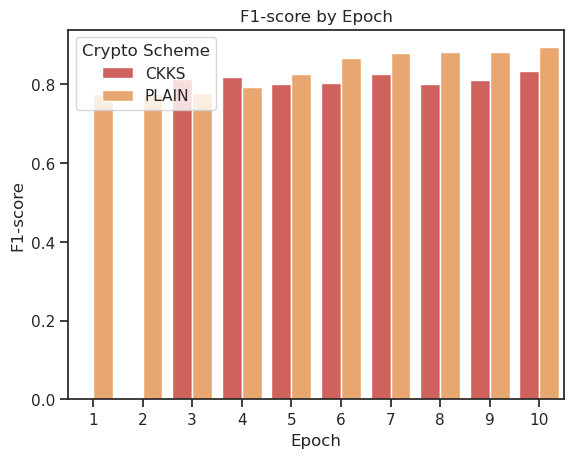

In [66]:
filtered_df = df_metrics[df_metrics['Activation'] == 'tanh']
sns.barplot(data=filtered_df, x='Epochs', hue='Crypto Scheme', y='F1-score')
plt.title("F1-score by Epoch - tanh")
plt.xlabel("Epoch")
plt.ylabel("F1-score")
plt.show()

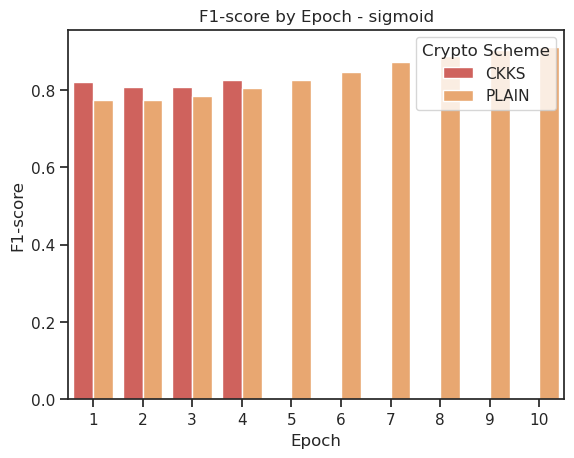

In [67]:
filtered_df = df_metrics[df_metrics['Activation'] == 'sigmoid']
sns.barplot(data=filtered_df, x='Epochs', hue='Crypto Scheme', y='F1-score')
plt.title("F1-score by Epoch - sigmoid")
plt.xlabel("Epoch")
plt.ylabel("F1-score")
plt.show()

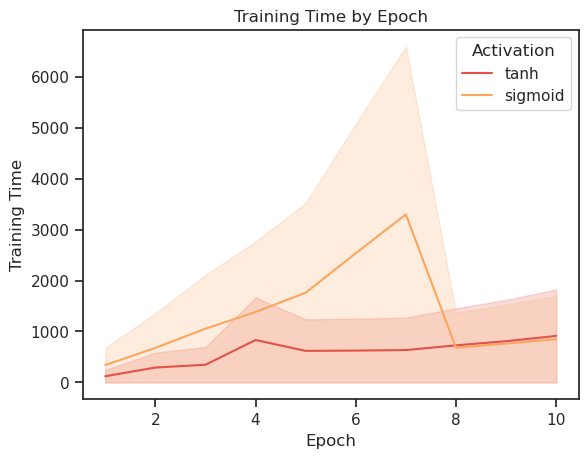

In [68]:
sns.lineplot(data=df_metrics, x='Epochs', hue='Activation', y='Training Time')
plt.title("Training Time by Epoch")
plt.xlabel("Epoch")
plt.ylabel("Training Time")
plt.show()